
<h1 align="center">Data Analysis from auto.am</h1>

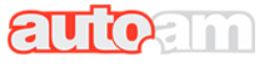

### We imported packeges, that we need for our project

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_palette("rocket")

### Create function, that scrape year, category, model and price for every auto in auto.am

In [2]:
def year_cat_mod_price(url):
    '''
    Create function, that scrape year, category, model and price for every auto in auto.am
    Input  --> link of auto
    Output --> list , which contains car's year, category, model and price
    
    example --> year_cat_mod_price('https://auto.am/offer/2556047') 
                output will be --> ['2008', 'Mitsubishi', 'Pajero ', 4800000]
    '''
    g=[] #empty list for future values
    page = requests.get(url).text #use requests package for read web site
    soup = BeautifulSoup(page, "lxml")#use BeautifulSoup package for crate HTML 
    for a in soup.find(class_="col s12 m12 l6").find_all(['a']):#chose class, where will be year, category and model
        g.append(a.text) #add value to list
    try: #check error or not
        for a in soup.find(class_="dropdown-content price-dropdown").find_all(['span']):#chose class, where will be price
            if('֏' in a.text):#if armenian Dram, then add to the list
                g.append(int(re.sub(' ', '', a.text[:-2]))) #take only numbers
    except:#if it is not number(example 'Պայմանագրային')
        for a in soup.find(class_="dropdown-button price bold").find_all(['small']):
            g.append(a.text[:-2]) #add value to list
            continue
    return g[1:] #return list from first index


### Create function, that scrape other factors for every auto in auto.am

In [3]:
def others(url):
    '''
        Create function, that scrape other factors for every auto in auto.am
        
        Input  --> link of auto
        Output --> other factors of car (+ factors from previous function)
        
        example --> others('https://auto.am/offer/2556085'_
                    output-->{'Մակնիշ': 'Volkswagen',
                              'Մոդել': 'Touareg ',
                              'Գին(դրամ)': 5760000,
                              'Տարի': '2008',
                              'Վազքը': '140000  կմ ',
                              'Թափքը': 'Ամենագնաց',
                              'Փոխանցման տուփը': 'Ավտոմատ',
                              'Ղեկը': 'Ձախ',
                              'Շարժիչը': 'Բենզին',
                              'Գույնը': 'Սպիտակ',
                              'Սրահի գույնը': 'Բեժ ',
                              'Շարժիչի ծավալը': '3.6',
                              'Մխոցների քանակը': '6',
                              'Քարշակը': 'Լիաքարշակ',
                              'Դռների քանակը': '5',
                              'Անվահեծերը': '19"',
                              'Տեղադրված է': '17.01.2021',
                              'Մոդիֆիկացիան': None,
                              'Ձիաուժը': None,
                              'Մոտոժամը': None,
                              'Բեռնատարողությունը, կգ / տ': None},
    '''
    import re 
    g=[] #empty list
    page = requests.get(url).text #use requests package for read web site
    soup = BeautifulSoup(page, "lxml")#use BeautifulSoup package for crate HTML 
    for a in soup.find(class_="pad-top-6 ad-det").find_all(['td']): #chose class, where will be factors
        g.append(re.sub('[\n\t]', '', a.text)) #add factors and their categories
    for a in soup.find(class_="ad-options grey-text"): #chose class, where will be published time
        g.append(a[1:12]) #append 'Տեղադրված է'
        g.append(a[15:]) # append pubished time
    col={} #create empty dictionary
    i=0 #index
    col['Մակնիշ']=year_cat_mod_price(url)[1] #add category of auto
    col['Մոդել']=year_cat_mod_price(url)[2] #add model of auto
    col['Գին(դրամ)']=year_cat_mod_price(url)[3] #add price of auto
    col['Տարի']=year_cat_mod_price(url)[0] #add year of auto
    while (i in range(len(g))): # while index is len then length of list, separate keys and values
        col[g[i]]=g[i+1]
        i+=2
    about_car=['Մակնիշ','Մոդել','Տարի','Գին(դրամ)','Վազքը','Մոդիֆիկացիան','Թափքը','Փոխանցման տուփը','Ղեկը','Շարժիչը',
               'Գույնը','Սրահի գույնը','Շարժիչի ծավալը','Ձիաուժը','Մխոցների քանակը','Քարշակը','Դռների քանակը','Անվահեծերը',
               'Մոտոժամը','Բեռնատարողությունը, կգ / տ','Տեղադրված է'] #factors about car
    for i in about_car:
        if i not in col.keys(): #if that factor is not in car's factors from web page, add this, and value equal to None
            col[i]=None
    new_dic={}
    for i in col.keys():
        if i in about_car: #if factor from web page doesn't exist in list(about_car), then don't add that factor in the new dictionary
            new_dic[i]=col[i]
    return new_dic #return final dictionary


### Create list, where would be add car's factor from various pages

In [ ]:
cars=[] #empty list
l=0 # index
for i in range(2556085,2536085,-2): #select range
    print('https://auto.am/offer/'+str(i))
    try: #check if web page is available
        cars.append(others('https://auto.am/offer/'+str(i))) #if available, then scrape factors about car
        l+=1
        #print('Done ->>>',l)
    except: # else go next
        continue
#cars

### Example of car factors

In [45]:
cars[5]

{'Մակնիշ': 'Mercedes-Benz',
 'Մոդել': 'E 200 ',
 'Գին(դրամ)': 2352000,
 'Տարի': '2001',
 'Վազքը': '350000  կմ ',
 'Մոդիֆիկացիան': 'Kompressor',
 'Թափքը': 'Սեդան',
 'Փոխանցման տուփը': 'Մեխանիկական',
 'Ղեկը': 'Ձախ',
 'Շարժիչը': 'Գազ',
 'Գույնը': 'Սև',
 'Տեղադրված է': '17.01.2021',
 'Սրահի գույնը': None,
 'Շարժիչի ծավալը': None,
 'Ձիաուժը': None,
 'Մխոցների քանակը': None,
 'Քարշակը': None,
 'Դռների քանակը': None,
 'Անվահեծերը': None,
 'Մոտոժամը': None,
 'Բեռնատարողությունը, կգ / տ': None}

### Create Dataframe for our data analysis

In [5]:
#create empty dataframe, and give columns(factors)
df_auto=pd.DataFrame(columns=['Մակնիշ','Մոդել','Գին(դրամ)','Տարի','Վազքը','Մոդիֆիկացիան','Թափքը','Փոխանցման տուփը','Ղեկը',
                              'Շարժիչը','Գույնը','Սրահի գույնը','Շարժիչի ծավալը','Ձիաուժը','Մխոցների քանակը','Քարշակը',
                              'Դռների քանակը','Անվահեծերը','Մոտոժամը','Բեռնատարողությունը, կգ / տ','Տեղադրված է'])


### Let's show our Data Frame

In [6]:
for car in cars:
    keyorder = ['Մակնիշ','Մոդել','Գին(դրամ)','Տարի','Վազքը','Մոդիֆիկացիան','Թափքը','Փոխանցման տուփը','Ղեկը',
                'Շարժիչը','Գույնը','Սրահի գույնը','Շարժիչի ծավալը','Ձիաուժը','Մխոցների քանակը','Քարշակը',
                'Դռների քանակը','Անվահեծերը','Մոտոժամը','Բեռնատարողությունը, կգ / տ','Տեղադրված է'] 
    f=sorted(car.items(), key=lambda i:keyorder.index(i[0])) #custom sorting dictionary 
    df_auto =df_auto.append({'Մակնիշ':f[0][1],'Մոդել':f[1][1],'Գին(դրամ)':f[2][1],'Տարի':f[3][1],'Վազքը':f[4][1],
                             'Մոդիֆիկացիան':f[5][1],'Թափքը':f[6][1],'Փոխանցման տուփը':f[7][1],'Ղեկը':f[8][1],
                             'Շարժիչը':f[9][1],'Գույնը':f[10][1],'Սրահի գույնը':f[11][1],'Շարժիչի ծավալը':f[12][1],
                             'Ձիաուժը':f[13][1],'Մխոցների քանակը':f[14][1],'Քարշակը':f[15][1],'Դռների քանակը':f[16][1],
                             'Անվահեծերը':f[17][1],'Մոտոժամը':f[18][1],'Բեռնատարողությունը, կգ / տ':f[19][1],'Տեղադրված է':f[20][1]},
                            ignore_index=True) #append row for every car
df_auto

,Մակնիշ,Մոդել,Գին(դրամ),Տարի,Վազքը,Մոդիֆիկացիան,Թափքը,Փոխանցման տուփը,Ղեկը,Շարժիչը,...,Սրահի գույնը,Շարժիչի ծավալը,Ձիաուժը,Մխոցների քանակը,Քարշակը,Դռների քանակը,Անվահեծերը,Մոտոժամը,"Բեռնատարողությունը, կգ / տ",Տեղադրված է
0,Volkswagen,Touareg,5760000,2008,140000 կմ,None,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,...,Բեժ,3.6,None,6,Լիաքարշակ,5,"19""",None,None,17.01.2021
1,Mercedes-Benz,S 550,Պայ,2011,120000 կմ,ANTERI VICHAK...FULL,Սեդան,Ավտոմատ,Ձախ,Բենզին,...,Սև,5.5,388,8,Լիաքարշակ,None,None,None,None,17.01.2021
2,Hyundai,Elantra,3504000,2012,150000 մղոն,1.8 Doj mator,Սեդան,Ավտոմատ,Ձախ,Բենզին,...,Մոխրագույն,1.8,150,4,Առջևի,5,"16""",None,None,17.01.2021
3,VAZ(Lada),2110,Պայ,1966,111 կմ,None,Սեդան,Մեխանիկական,Ձախ,Բենզին,...,None,None,None,None,None,None,None,None,None,17.01.2021
4,Toyota,Camry,5856000,2015,55000 մղոն,Se,Սեդան,Ավտոմատ,Ձախ,Բենզին,...,None,None,None,None,None,None,None,None,None,17.01.2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,Nissan,Tiida,1776000,2007,130000 կմ,None,Հետչբեք,Ավտոմատ,Աջ,Գազ,...,None,None,None,None,None,None,None,None,None,06.12.2020
5375,Nissan,X-Trail,2400000,2004,133000 կմ,None,Ամենագնաց,Ավտոմատ,Աջ,Բենզին,...,Մոխրագույն,2.0,150,None,Լիաքարշակ,5,"16""",None,None,06.12.2020
5376,Nissan,Tiida,Պայ,2010,52000 կմ,None,Հետչբեք,Վարիատոր,Ձախ,Բենզին,...,Սև,1.5,None,None,Առջևի,None,None,None,None,06.12.2020
5377,Hyundai,Solaris,2400000,2012,9999 կմ,None,Սեդան,Ավտոմատ,Ձախ,Գազ,...,None,None,None,None,None,None,None,None,None,06.12.2020


### Save data frame to csv file

In [7]:
df_auto.to_csv('auto_am_scraping.csv',index=False, encoding="utf-8")

## Start data Analysis

### Import csv file

In [8]:
df_auto=pd.read_csv('auto_am_scraping.csv') #read csv file

### DataFrame

In [9]:
df_auto #dataframe

,Մակնիշ,Մոդել,Գին(դրամ),Տարի,Վազքը,Մոդիֆիկացիան,Թափքը,Փոխանցման տուփը,Ղեկը,Շարժիչը,...,Սրահի գույնը,Շարժիչի ծավալը,Ձիաուժը,Մխոցների քանակը,Քարշակը,Դռների քանակը,Անվահեծերը,Մոտոժամը,"Բեռնատարողությունը, կգ / տ",Տեղադրված է
0,Volkswagen,Touareg,5760000,2008,140000 կմ,NaN,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,...,Բեժ,3.6,NaN,6.0,Լիաքարշակ,5.0,"19""",NaN,NaN,17.01.2021
1,Mercedes-Benz,S 550,Պայ,2011,120000 կմ,ANTERI VICHAK...FULL,Սեդան,Ավտոմատ,Ձախ,Բենզին,...,Սև,5.5,388,8.0,Լիաքարշակ,NaN,NaN,NaN,NaN,17.01.2021
2,Hyundai,Elantra,3504000,2012,150000 մղոն,1.8 Doj mator,Սեդան,Ավտոմատ,Ձախ,Բենզին,...,Մոխրագույն,1.8,150,4.0,Առջևի,5.0,"16""",NaN,NaN,17.01.2021
3,VAZ(Lada),2110,Պայ,1966,111 կմ,NaN,Սեդան,Մեխանիկական,Ձախ,Բենզին,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.01.2021
4,Toyota,Camry,5856000,2015,55000 մղոն,Se,Սեդան,Ավտոմատ,Ձախ,Բենզին,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.01.2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,Nissan,Tiida,1776000,2007,130000 կմ,NaN,Հետչբեք,Ավտոմատ,Աջ,Գազ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06.12.2020
5375,Nissan,X-Trail,2400000,2004,133000 կմ,NaN,Ամենագնաց,Ավտոմատ,Աջ,Բենզին,...,Մոխրագույն,2.0,150,NaN,Լիաքարշակ,5.0,"16""",NaN,NaN,06.12.2020
5376,Nissan,Tiida,Պայ,2010,52000 կմ,NaN,Հետչբեք,Վարիատոր,Ձախ,Բենզին,...,Սև,1.5,NaN,NaN,Առջևի,NaN,NaN,NaN,NaN,06.12.2020
5377,Hyundai,Solaris,2400000,2012,9999 կմ,NaN,Սեդան,Ավտոմատ,Ձախ,Գազ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06.12.2020


### Show statistical report from numeric columns

In [10]:
df_auto.describe()

,Տարի,Շարժիչի ծավալը,Մխոցների քանակը,Դռների քանակը,Մոտոժամը
count,5379.00000,1627.000000,881.000000,965.000000,4.0000
mean,2010.21807,2.664905,5.224745,4.290155,12535.5000
std,7.06398,0.996601,1.712753,0.698811,24976.3499
min,1959.00000,0.200000,1.000000,1.000000,10.0000
25%,2005.00000,2.000000,4.000000,4.000000,41.5000
50%,2011.00000,2.500000,4.000000,4.000000,66.0000
75%,2016.00000,3.200000,6.000000,5.000000,12560.0000
max,2022.00000,7.000000,16.000000,5.000000,50000.0000


### For deep information, show number of not-null values and type of each column

In [11]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Մակնիշ                      5379 non-null   object 
 1   Մոդել                       5379 non-null   object 
 2   Գին(դրամ)                   5379 non-null   object 
 3   Տարի                        5379 non-null   int64  
 4   Վազքը                       5379 non-null   object 
 5   Մոդիֆիկացիան                2587 non-null   object 
 6   Թափքը                       5259 non-null   object 
 7   Փոխանցման տուփը             5370 non-null   object 
 8   Ղեկը                        5360 non-null   object 
 9   Շարժիչը                     5370 non-null   object 
 10  Գույնը                      5372 non-null   object 
 11  Սրահի գույնը                1234 non-null   object 
 12  Շարժիչի ծավալը              1627 non-null   float64
 13  Ձիաուժը                     936 n

### Drop columns, that have many missing values

In [12]:
df_auto=df_auto.drop(columns=['Մոդիֆիկացիան','Սրահի գույնը','Մոտոժամը','Շարժիչի ծավալը','Ձիաուժը','Մխոցների քանակը',
                              'Քարշակը','Դռների քանակը','Անվահեծերը','Բեռնատարողությունը, կգ / տ'])

### Data Frame after dropping

In [13]:
df_auto

,Մակնիշ,Մոդել,Գին(դրամ),Տարի,Վազքը,Թափքը,Փոխանցման տուփը,Ղեկը,Շարժիչը,Գույնը,Տեղադրված է
0,Volkswagen,Touareg,5760000,2008,140000 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Սպիտակ,17.01.2021
1,Mercedes-Benz,S 550,Պայ,2011,120000 կմ,Սեդան,Ավտոմատ,Ձախ,Բենզին,Սև,17.01.2021
2,Hyundai,Elantra,3504000,2012,150000 մղոն,Սեդան,Ավտոմատ,Ձախ,Բենզին,Սև,17.01.2021
3,VAZ(Lada),2110,Պայ,1966,111 կմ,Սեդան,Մեխանիկական,Ձախ,Բենզին,Սպիտակ,17.01.2021
4,Toyota,Camry,5856000,2015,55000 մղոն,Սեդան,Ավտոմատ,Ձախ,Բենզին,Կապույտ,17.01.2021
...,...,...,...,...,...,...,...,...,...,...,...
5374,Nissan,Tiida,1776000,2007,130000 կմ,Հետչբեք,Ավտոմատ,Աջ,Գազ,Սպիտակ,06.12.2020
5375,Nissan,X-Trail,2400000,2004,133000 կմ,Ամենագնաց,Ավտոմատ,Աջ,Բենզին,Այլ գույն,06.12.2020
5376,Nissan,Tiida,Պայ,2010,52000 կմ,Հետչբեք,Վարիատոր,Ձախ,Բենզին,Սև,06.12.2020
5377,Hyundai,Solaris,2400000,2012,9999 կմ,Սեդան,Ավտոմատ,Ձախ,Գազ,Մոխրագույն,06.12.2020


### Show number of cars, that don't have numerical price and plot density plot of car's year

In [14]:
df_paym=df_auto[df_auto['Գին(դրամ)']=='Պայ'] #selection from fataframe
len(df_paym)

247

C:\Users\HOME\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


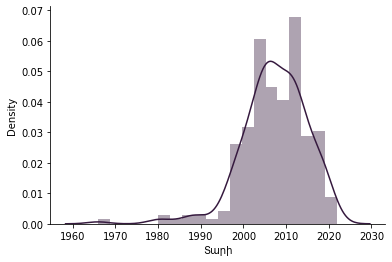

In [15]:
#plt.rcParams.update(plt.rcParamsDefault)
ax=sns.distplot(df_paym['Տարի'])
sns.despine() 
plt.show()

### Drop non numerical prices from data frame and correct index

In [16]:
df_auto=df_auto[df_auto['Գին(դրամ)'] != 'Պայ']
df_auto=df_auto.reset_index()
df_auto

,index,Մակնիշ,Մոդել,Գին(դրամ),Տարի,Վազքը,Թափքը,Փոխանցման տուփը,Ղեկը,Շարժիչը,Գույնը,Տեղադրված է
0,0,Volkswagen,Touareg,5760000,2008,140000 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Բենզին,Սպիտակ,17.01.2021
1,2,Hyundai,Elantra,3504000,2012,150000 մղոն,Սեդան,Ավտոմատ,Ձախ,Բենզին,Սև,17.01.2021
2,4,Toyota,Camry,5856000,2015,55000 մղոն,Սեդան,Ավտոմատ,Ձախ,Բենզին,Կապույտ,17.01.2021
3,5,Mercedes-Benz,E 200,2352000,2001,350000 կմ,Սեդան,Մեխանիկական,Ձախ,Գազ,Սև,17.01.2021
4,6,VAZ(Lada),2115,792000,2004,320000 կմ,Սեդան,Մեխանիկական,Ձախ,Գազ,Սև,17.01.2021
...,...,...,...,...,...,...,...,...,...,...,...,...
5127,5373,Lexus,RX 450h,8208000,2010,114000 կմ,Ամենագնաց,Ավտոմատ,Ձախ,Հիբրիդ,Մոխրագույն,06.12.2020
5128,5374,Nissan,Tiida,1776000,2007,130000 կմ,Հետչբեք,Ավտոմատ,Աջ,Գազ,Սպիտակ,06.12.2020
5129,5375,Nissan,X-Trail,2400000,2004,133000 կմ,Ամենագնաց,Ավտոմատ,Աջ,Բենզին,Այլ գույն,06.12.2020
5130,5377,Hyundai,Solaris,2400000,2012,9999 կմ,Սեդան,Ավտոմատ,Ձախ,Գազ,Մոխրագույն,06.12.2020


## Fill missing value

### Fill 'Ղեկ' column
### First show distibution of that column 

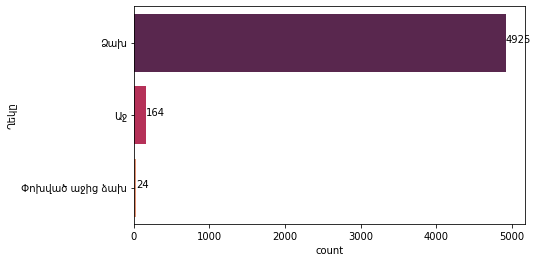

In [17]:
plt.figure(figsize=(7,4)) #size of figure
ax = sns.countplot(y='Ղեկը',palette="rocket",data=df_auto,order = df_auto['Ղեկը'].value_counts().index) #countplot from seaborn
for index, value in enumerate(df_auto['Ղեկը'].value_counts(ascending=False)): #show values in figure
    plt.text(value, index, str(value))
plt.show()

### Fill missing value 'Աջ'

In [18]:
df_auto['Ղեկը']=df_auto['Ղեկը'].fillna('Աջ')

### Fill 'Թափքը' column
### First show distibution of that column

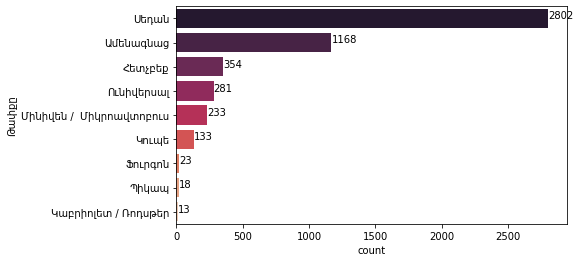

In [19]:
plt.figure(figsize=(7,4)) #size of figure
ax = sns.countplot(y='Թափքը',palette="rocket",data=df_auto,order = df_auto['Թափքը'].value_counts().index) #countplot from seaborn

for index, value in enumerate(df_auto['Թափքը'].value_counts(ascending=False)): #show values in figure
    plt.text(value, index, str(value))
plt.show()

### Fill missing value 'Ամենագնաց'

In [20]:
df_auto['Թափքը']=df_auto['Թափքը'].fillna('Ամենագնաց')

### Fill 'Փոխանցման տուփը' column
### First show distibution of that column

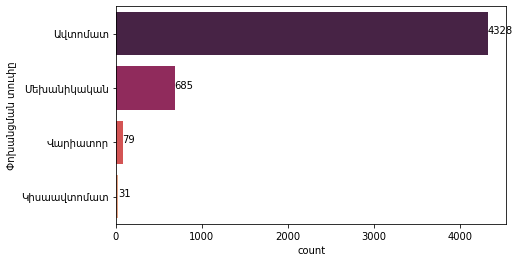

In [21]:
plt.figure(figsize=(7,4)) #size of figure
#countplot from seaborn
ax = sns.countplot(y='Փոխանցման տուփը',palette="rocket",data=df_auto,order = df_auto['Փոխանցման տուփը'].value_counts().index)
for index, value in enumerate(df_auto['Փոխանցման տուփը'].value_counts(ascending=False)): #show values in figure
    plt.text(value, index, str(value))
plt.show()

### Fill missing value 'Մեխանիկական'

In [22]:
df_auto['Փոխանցման տուփը']=df_auto['Փոխանցման տուփը'].fillna('Մեխանիկական')

### Fill 'Շարժիչը' column
### First show distibution of that column

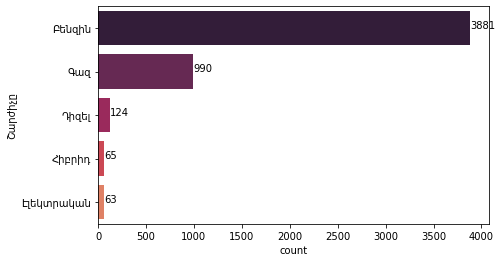

In [23]:
plt.figure(figsize=(7,4)) #size of figure
#countplot from seaborn
ax = sns.countplot(y='Շարժիչը',data=df_auto,order = df_auto['Շարժիչը'].value_counts().index)
for index, value in enumerate(df_auto['Շարժիչը'].value_counts(ascending=False)): #show values in figure
    plt.text(value, index, str(value))
plt.show()

### Fill missing value 'Գազ'

In [24]:
df_auto['Շարժիչը']=df_auto['Շարժիչը'].fillna('Գազ')

### Fill 'Գույնը' column
### First show distibution of that column

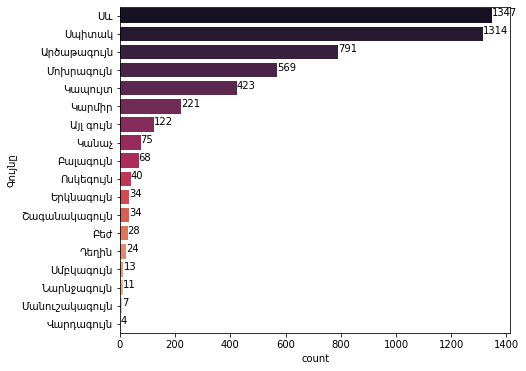

In [25]:
plt.figure(figsize=(7,6)) #size of figure
#countplot from seaborn
ax = sns.countplot(y='Գույնը',palette="rocket",data=df_auto,order = df_auto['Գույնը'].value_counts().index)
for index, value in enumerate(df_auto['Գույնը'].value_counts(ascending=False)): #show values in figure
    plt.text(value, index, str(value))
plt.show()

### Fill missing value 'Կանաչ'

In [26]:
df_auto['Գույնը']=df_auto['Գույնը'].fillna('Կանաչ')

## Setting the type of columns

In [27]:
df_auto['Մակնիշ'] = df_auto['Մակնիշ'].astype('category')
df_auto['Մոդել'] = df_auto['Մոդել'].astype('category')
df_auto['Մակնիշ'] = df_auto['Մակնիշ'].astype(str)
df_auto['Գին(դրամ)'] = df_auto['Գին(դրամ)'].astype(int)
df_auto['Տարի'] = df_auto['Տարի'].astype(int)
df_auto['Թափքը'] = df_auto['Թափքը'].astype('category')
df_auto['Փոխանցման տուփը'] = df_auto['Փոխանցման տուփը'].astype('category')
df_auto['Ղեկը'] = df_auto['Ղեկը'].astype('category')
df_auto['Շարժիչը'] = df_auto['Շարժիչը'].astype('category')
df_auto['Գույնը'] = df_auto['Գույնը'].astype('category')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            5132 non-null   int64   
 1   Մակնիշ           5132 non-null   object  
 2   Մոդել            5132 non-null   category
 3   Գին(դրամ)        5132 non-null   int32   
 4   Տարի             5132 non-null   int32   
 5   Վազքը            5132 non-null   object  
 6   Թափքը            5132 non-null   category
 7   Փոխանցման տուփը  5132 non-null   category
 8   Ղեկը             5132 non-null   category
 9   Շարժիչը          5132 non-null   category
 10  Գույնը           5132 non-null   category
 11  Տեղադրված է      5132 non-null   object  
dtypes: category(6), int32(2), int64(1), object(3)
memory usage: 261.4+ KB


### Change 'Վազքը' column from string format to integer

In [28]:
df_auto['Վազքը']

0         140000  կմ 
1       150000  մղոն 
2        55000  մղոն 
3         350000  կմ 
4         320000  կմ 
            ...      
5127      114000  կմ 
5128      130000  կմ 
5129      133000  կմ 
5130        9999  կմ 
5131      135000  կմ 
Name: Վազքը, Length: 5132, dtype: object

### Create Function, that change every element from that column to kilometr

In [29]:
def passuum_to_km(distance):
    if 'կմ' in distance:
        distance=re.sub(' ', '', distance)[:-2]
    if 'մղոն' in distance:
        distance=1.609*int(re.sub(' ', '', distance)[:-4])
    return int(distance)

In [30]:
for i in range(len(df_auto)): #loop for change column'v value to kilometr
    df_auto['Վազքը'][i]=passuum_to_km(df_auto['Վազքը'][i])
df_auto['Վազքը'] = df_auto['Վազքը'].astype(int) #set integer type

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Create column for price (change from ֏ to $)

In [31]:
df_auto['Գին(դոլար)']=df_auto['Գին(դրամ)']/480

### Density plot for price for Mercedes-Benz

C:\Users\HOME\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


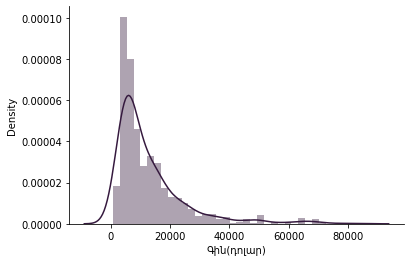

In [32]:
ax=sns.distplot(df_auto[df_auto['Մակնիշ']=='Mercedes-Benz']['Գին(դոլար)'][df_auto['Գին(դոլար)']<150000])
sns.despine() 
plt.show()

## Add some categorigal columns from existing column
### Create range category for price

In [33]:
x=df_auto['Գին(դոլար)']
conditions  = [ x >= 50000, (x < 50000) & (x>= 20000),(x < 20000) & (x>= 10000),(x < 10000) & (x>= 8000),
               (x < 8000) & (x>= 6000),(x < 6000) & (x> 5000),x <= 5000]
choices     = [ '>= 50000','[20000;50000)', '[10000;20000)','[8000;10000)','[6000;8000)',
               '[5000;6000)','<= 5000']

df_auto['Գնային մակարդակ'] = pd.Categorical(np.select(conditions, choices),
                            categories=[ '>= 50000','[20000;50000)', '[10000;20000)','[8000;10000)','[6000;8000)',
                                       '[5000;6000)','<= 5000'][::-1],ordered=True)

### Show distribution of that column

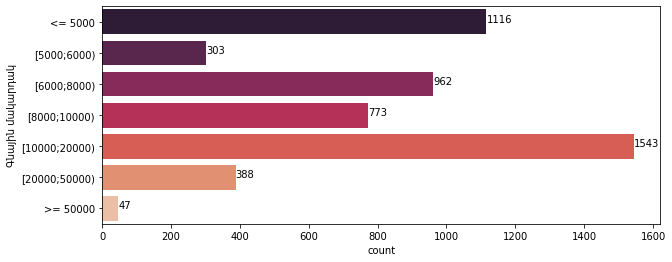

In [34]:
sns.set_palette("rocket") #color style
plt.figure(figsize=(10,4))
ax = sns.countplot(y='Գնային մակարդակ',palette="rocket",
                   data=df_auto,order = df_auto['Գնային մակարդակ'].value_counts().sort_index().index)
for index, value in enumerate(df_auto['Գնային մակարդակ'].value_counts().sort_index()):
    plt.text(value, index, str(value))
plt.show()

### Show relationshep between 'Մակնիշ' and 'Գնային մակարդակ' columns

In [35]:
pd.crosstab(df_auto['Մակնիշ'],df_auto['Գնային մակարդակ'])

Գնային մակարդակ,<= 5000,[5000;6000),[6000;8000),[8000;10000),[10000;20000),[20000;50000),>= 50000
Մակնիշ,,,,,,,
Acura,0,0,0,1,0,0,0
Audi,3,0,3,0,8,5,1
BMW,66,32,71,58,152,43,2
BRP Can-am,0,0,0,1,0,0,0
BYD,1,0,0,0,0,0,0
Bentley,0,0,0,0,0,2,0
Buick,0,0,1,0,0,0,0
Cadillac,0,0,0,1,2,1,0
Chevrolet,36,9,19,24,26,5,0


### Create range category for year and show distribution

In [36]:
y=df_auto['Տարի']
conditions  = [ y >= 2015, (y < 2015) & (y> 2000), y <= 2000]
choices     = [ "Նոր", 'Միջին տարիքի', 'Հին' ]
    
df_auto['Մեքենայի տարիք']=np.select(conditions, choices)

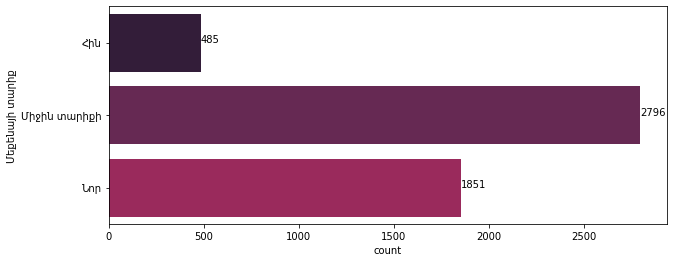

In [37]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y='Մեքենայի տարիք',
                   data=df_auto,order = df_auto['Մեքենայի տարիք'].value_counts().sort_index().index)
for index, value in enumerate(df_auto['Մեքենայի տարիք'].value_counts().sort_index()):
    plt.text(value, index, str(value))
plt.show()

### Show relationshep between 'Մեքենայի տարիք' and 'Գնային մակարդակ' columns

In [38]:
pd.crosstab(df_auto['Մեքենայի տարիք'],df_auto['Գնային մակարդակ'])

Գնային մակարդակ,<= 5000,[5000;6000),[6000;8000),[8000;10000),[10000;20000),[20000;50000),>= 50000
Մեքենայի տարիք,,,,,,,
Հին,399,40,19,7,12,7,1
Միջին տարիքի,601,230,649,418,704,179,15
Նոր,116,33,294,348,827,202,31


### Show price distribution for all individual age cars

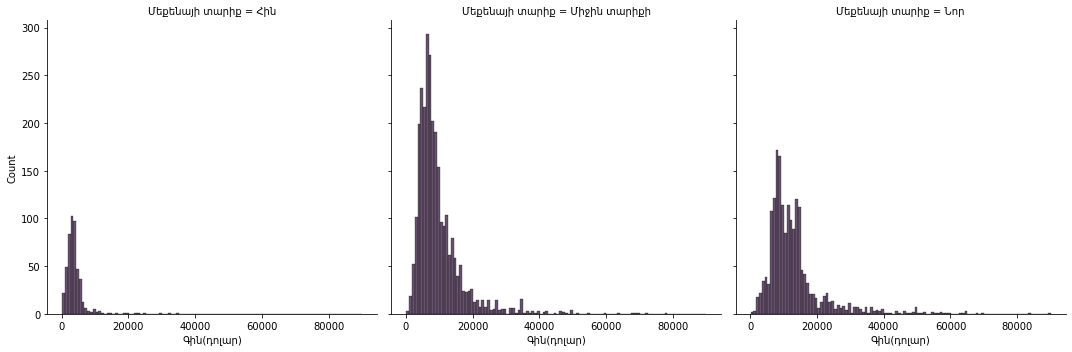

In [39]:
sns.displot(df_auto[df_auto['Գին(դոլար)']<100000], x='Գին(դոլար)', col="Մեքենայի տարիք",palette="rocket",
            col_order=['Հին','Միջին տարիքի','Նոր'])
plt.show()

### Separate only black and white cars from dataframe, and show price distribution for 2 categories

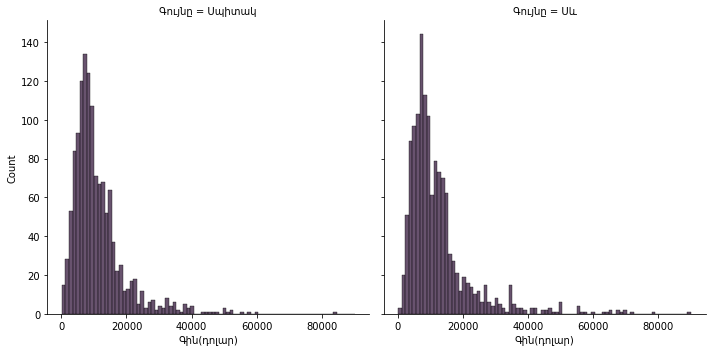

In [40]:
df_black_white=df_auto[(df_auto['Գին(դոլար)']<100000) & ((df_auto['Գույնը']=='Սև') | (df_auto['Գույնը']=='Սպիտակ'))].reset_index()
df_black_white['Գույնը']=df_black_white['Գույնը'].cat.remove_unused_categories()
sns.displot(df_black_white, x='Գին(դոլար)', col="Գույնը",palette="rocket")
plt.show()

### Show distribution of 'Վազքը' column (<900000)

C:\Users\HOME\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


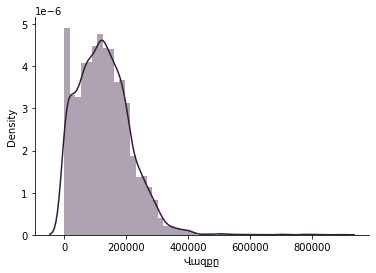

In [41]:
ax=sns.distplot(df_auto[df_auto['Վազքը']<900000]['Վազքը'])
sns.despine() 
plt.show()

### Show relationshep between "Գին(դրամ)" and "Վազքը" (scatter plot and regresion line)

C:\Users\HOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


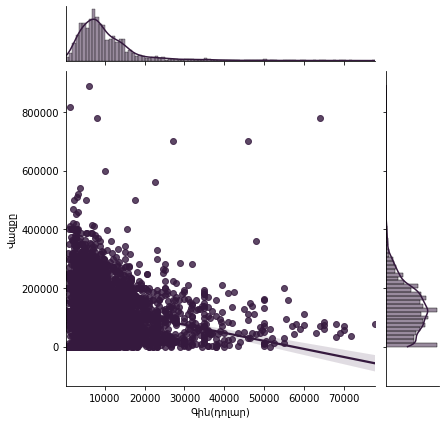

In [42]:
sns.jointplot("Գին(դոլար)", "Վազքը",
              data=df_auto[(df_auto['Գին(դոլար)']<80000) & (df_auto['Վազքը']<900000)],
              kind='reg')
sns.despine() 
plt.show()

## Hypothesis testing

## Student’s t-test
### Tests whether the means of two independent samples are significantly different.

<ul>
    <li>H0: the means of the samples are equal.</li>
    <li>H1: the means of the samples are unequal.</li>
</ul>


In [43]:
from scipy.stats import ttest_ind #import module
data_black = df_black_white[df_black_white['Գույնը']=='Սև']['Գին(դոլար)'] #take only black cars
data_white = df_black_white[df_black_white['Գույնը']=='Սպիտակ']['Գին(դոլար)'] #take only white cars
stat, p = ttest_ind(data_black, data_white) #t_test
print('stat=%.3f, p_value=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=3.518, p_value=0.000
Probably different distributions


## Mann-Whitney U Test
### Tests whether the distributions of two independent samples are equal or not.

<ul>
    <li>H0: the distributions of both samples are equal.</li>
    <li>H1: the distributions of both samples are not equal.</li>
</ul>


In [44]:
from scipy.stats import mannwhitneyu
data_black = df_black_white[df_black_white['Գույնը']=='Սև']['Գին(դոլար)']
data_white = df_black_white[df_black_white['Գույնը']=='Սպիտակ']['Գին(դոլար)']
stat, p = mannwhitneyu(data_black, data_white)
print('stat=%.3f, p_value=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=835621.500, p_value=0.008
Probably different distributions


## Best Reagards
<h4 align="left">Artur Avagyan</h4>
    <ul>
    <li>Actuarial supervisor at Central Bank of Armenia</li>
    <li>Student from YSU (Data Science for Business Master's Degree Program)</li>
    <li>E-mail:   avagyan.artur97@gmail.com</li>
    <li>LinkedIn: <a href="https://www.linkedin.com/in/artur-avagyan-0a16311b3">Artur Avagyan</a></li>
    <li>GitHub:   <a href="https://github.com/artur-avagyan">Artur Avagyan</a></li>
    <li>Phone:    +37498641815</li>
    </ul>